## Домашняя работа по базовой математической статистике для Data scientist

Задания со зведочкой не обязательны для зачета.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats


df = pd.read_csv("/home/arcry/anaconda3/SkillBox/files/bikeshare.csv")
del df['datetime']

In [16]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

<ipython-input-23-170a6b253ba6>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax, bins=30, bottom=0.1, log=True)


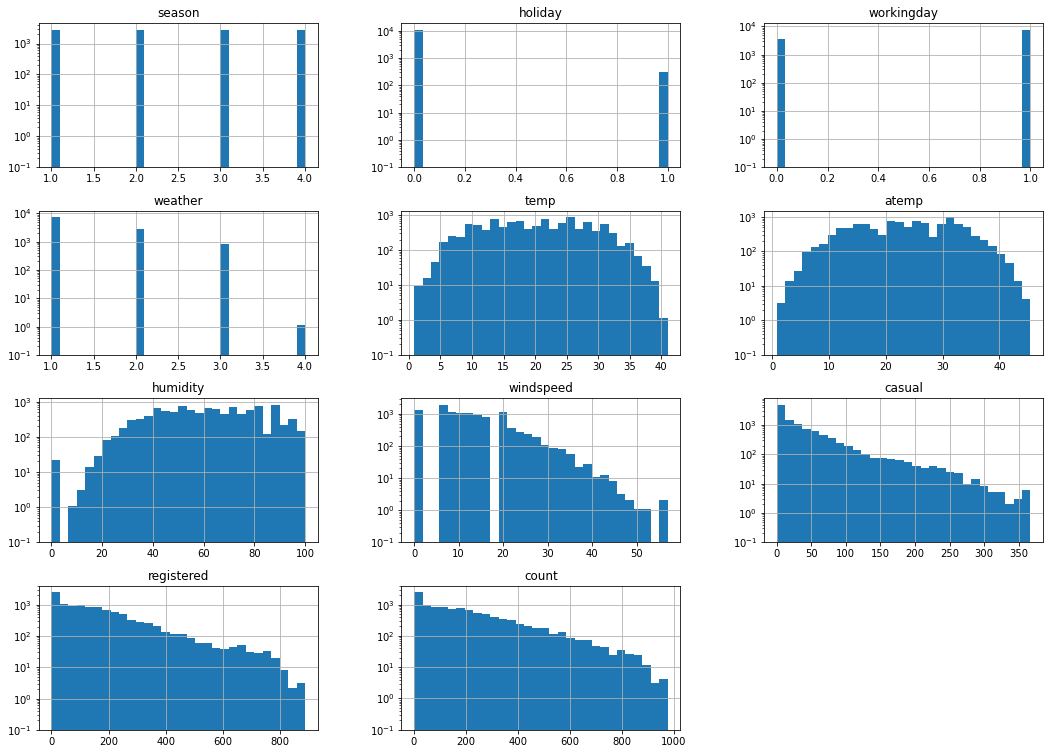

In [23]:
fig, ax = plt.subplots(figsize=(18,13))
df.hist(ax=ax, bins=30, bottom=0.1, log=True)
plt.show()

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [34]:
# Присутствуют аномалия в виде сезонности, аномальные выбросы, отдельные класатеры в распределении, 
# отсутствуют распределения, похожие на нормальное.

In [95]:
df.describe(percentiles=[0.5, 0.75, 0.99]).append(df.agg('mode'))

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
99%,4.000000,1.000000,1.000000,3.000000,36.08000,40.150000,100.000000,35.000800,240.150000,697.000000,774.150000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
0,4.000000,0.000000,1.000000,1.000000,14.76000,31.060000,88.000000,0.000000,0.000000,3.000000,5.000000


In [65]:
for i, j in enumerate(df.columns):
    print(j)
    print('mean = %0.3f' %df[j].mean())
    print('std = %0.3f' %df[j].std())
    print('perc_50 = %0.3f' %np.percentile(df[j], 50))
    print('perc_75 = %0.3f' %np.percentile(df[j], 75))
    print('perc_99 = %0.3f' %np.percentile(df[j], 99))
    print('mode = %0.3f' %df[j].mode())
    print()


season
mean = 2.507
std = 1.116
perc_50 = 3.000
perc_75 = 4.000
perc_99 = 4.000
mode = 4.000

holiday
mean = 0.029
std = 0.167
perc_50 = 0.000
perc_75 = 0.000
perc_99 = 1.000
mode = 0.000

workingday
mean = 0.681
std = 0.466
perc_50 = 1.000
perc_75 = 1.000
perc_99 = 1.000
mode = 1.000

weather
mean = 1.418
std = 0.634
perc_50 = 1.000
perc_75 = 2.000
perc_99 = 3.000
mode = 1.000

temp
mean = 20.231
std = 7.792
perc_50 = 20.500
perc_75 = 26.240
perc_99 = 36.080
mode = 14.760

atemp
mean = 23.655
std = 8.475
perc_50 = 24.240
perc_75 = 31.060
perc_99 = 40.150
mode = 31.060

humidity
mean = 61.886
std = 19.245
perc_50 = 62.000
perc_75 = 77.000
perc_99 = 100.000
mode = 88.000

windspeed
mean = 12.799
std = 8.165
perc_50 = 12.998
perc_75 = 16.998
perc_99 = 35.001
mode = 0.000

casual
mean = 36.022
std = 49.960
perc_50 = 17.000
perc_75 = 49.000
perc_99 = 240.150
mode = 0.000

registered
mean = 155.552
std = 151.039
perc_50 = 118.000
perc_75 = 222.000
perc_99 = 697.000
mode = 3.000

count
mean 

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [81]:
df.agg(['kurtosis', 'skew'])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
kurtosis,-1.355661,30.046975,-1.397828,0.395533,-0.914530,-0.850076,-0.759818,0.630133,7.551629,2.626081,1.300093
skew,-0.007076,5.660517,-0.776163,1.243484,0.003691,-0.102560,-0.086335,0.588767,2.495748,1.524805,1.242066


### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

In [102]:
df.agg('std').sort_values()

holiday         0.166599
workingday      0.466159
weather         0.633839
season          1.116174
temp            7.791590
windspeed       8.164537
atemp           8.474601
humidity       19.245033
casual         49.960477
registered    151.039033
count         181.144454
dtype: float64

In [105]:
stats.norm.interval(0.95, loc=df['count'].mean(), scale=df['count'].std())

(-163.46247359398956, 546.610737419086)

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [110]:
def mean_std(df_, column):
    mean = df[column].mean()
    std = df[column].std()
    return mean, std

In [116]:
for i in df.columns:
    mean, std = mean_std(df, i)
    cnt = df[i][df[i] >= mean + 3*std].count()
    print(i, cnt)

season 0
holiday 311
workingday 0
weather 1
temp 0
atemp 0
humidity 0
windspeed 67
casual 292
registered 235
count 147


In [117]:
# Больше всего аномалий в метриках holiday и casual

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [121]:
corr_matr = df.corr()
corr_matr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<AxesSubplot:>

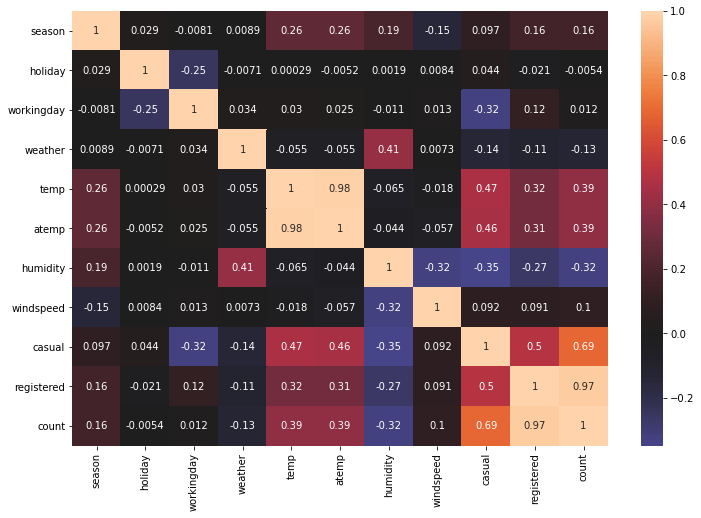

In [124]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matr, center=0, annot=True)

In [ ]:
# Заметна небольшая связь между температурой и сезоном, температурой и count,
# есть связь между casual и температурой
# есть заметная отрицательная связь между casual и humidity, windspeed и humidity